# Computer Homework 4: The Method of Relaxation Meets Capacitors

In the last assignment, you used the method of relaxation to find the potential inside a rectangular box, where the potential was specified on the sides. Now, it turns out that we could have solved that particular problem analytically (you will learn how to do this in Physics 405). But the real power of the method of relaxation is that it allows us to study problems that don't have an analytical solution, but occur frequently in the real world. 

Consider the familiar example of a parallel-plate capacitor. In most physics classes, we pretend that the electric field between the plates can be approximated by the field of two infinite charged planes, so it's constant in between the plates and zero everywhere outside. Here's a typical illustration of this approximation:

<img src="capacitor.gif" alt="Parallel-plate capacitor" style="width: 200px;"/>

In reality, this is an idealization, like frictionless surfaces and masssless springs. The approximation works as long as the linear dimensions of the plates are large compared to the separation: $A\gg d^2$. In this assignment we'll apply this technique to understand what the electric field of a parallel-plate capacitor <i>really</i> looks like, and learn how the usual approximation starts to break down as the plate separation increases.

It will help you to review the last assignment, as you should be able to recycle much of your code.

## Import the usual libraries

In [56]:
import numpy as np                         # numpy is a library that inclues most of the numerical funciton you will need
import matplotlib.pyplot as plt            # this is the library we use to plot
import matplotlib.cm as cm                 # allows us to choose a variety of colormaps
from mpl_toolkits.mplot3d import Axes3D    # this is a special library to plot in 3d

### Boundary conditions

In the last assignment, you began with a grid of potential values, ```V```. The potential on the sides of the box was fixed. You may have implemented these constraints through a function like this:

In [58]:
# This function sets the values of V on the sides to those given in the problem.
def impose_left_right_boundary_conditions(V):
    Vnew = V
    Vnew[:,0] = -100       # set left side to V=-100
    Vnew[:,-1] = 100       # ...and right side to V=+100
    Vnew[0,:] = 0          # set top side to 0
    Vnew[-1,:] = 0         # ... and bottom side to 0
    return Vnew

The remainder of your code simply implemented the method of relaxation and made some plots. Here's the beauty of writing modular code: <b>by changing the boundary conditions in this one function, you can solve any other problem!</b>

As an example, let's compute the potential of an electric dipole. To do this, we'll simply change the function above so that ```V``` is constrained to have equal and opposite values at two nearby pixels.

In [60]:
# This function mimics an electric dipole: 
def impose_dipole_boundary_conditions(V, print_steps=False):
    Vnew = V
    # Find the center of the grid, and place the charges near that point.
    if print_steps : 
        print('Finding midpoints in ',V.shape)
    mid_x = int(V.shape[1]/2)   # midpoint of x-dimension
    mid_y = int(V.shape[0]/2)   # midpoint of y-dimension
    if print_steps : 
        print('Midpoints are ', mid_x, mid_y)
        print('Pixels above and below this are ')
        print(mid_x, mid_y-4)
        print(mid_x, mid_y+4)
        print('Setting these to equal and opposite values: ',100,-100)
    Vnew[mid_y-4][mid_x] = 100  # set upper pixel to V=+100
    Vnew[mid_y+4][mid_x] = -100 # set lower pixel to V=-100
    return Vnew

First we'll illustrate this function with a small, "toy" array that's small enough to print easily:

In [62]:
V = np.zeros((12,12))
print('Before imposing boundary conditions')
print(V)
V = impose_dipole_boundary_conditions(V, print_steps=True)
print('After imposing boundary conditions')
print(V)

Before imposing boundary conditions
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Finding midpoints in  (12, 12)
Midpoints are  6 6
Pixels above and below this are 
6 2
6 10
Setting these to equal and opposite values:  100 -100
After imposing boundary conditions
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.  100.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0. 

This makes a dipole oriented vertically. 

**Below, create a new function ```impose_horizontal_dipole_boundary_conditions``` to make a horizontal dipole.  You can use the above function as a template to modify.**

In [64]:
# Your code for in class exercise here
def impose_horizontal_dipole_boundary_conditions(V, print_steps=False):
    Vnew = V
    # Find the center of the grid, and place the charges near that point.
    if print_steps : 
        print('Finding midpoints in ',V.shape)
    mid_x = int(V.shape[0]/2)   # midpoint of x-dimension
    mid_y = int(V.shape[1]/2)   # midpoint of y-dimension
    if print_steps: 
        print('Midpoints are ', mid_x, mid_y)
        print('Pixels above and below this are ')
        print(mid_x-4, mid_y)
        print(mid_x+4, mid_y)
        print('Setting these to equal and opposite values: ',100,-100)
    Vnew[mid_y][mid_x-4] = 100  # set upper pixel to V=+100
    Vnew[mid_y][mid_x+4] = -100 # set lower pixel to V=-100
    return Vnew

V = np.zeros((12,12))
print('Before imposing boundary conditions')
print(V)
V = impose_horizontal_dipole_boundary_conditions(V, print_steps=True)
print('After imposing boundary conditions')
print(V)

Before imposing boundary conditions
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Finding midpoints in  (12, 12)
Midpoints are  6 6
Pixels above and below this are 
2 6
10 6
Setting these to equal and opposite values:  100 -100
After imposing boundary conditions
[[   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0. 

Next, we'll make a much larger, more physically realistic grid, and implement the relaxation method. These next steps should require few, if any, modifications to the code you wrote in the last assignment. 

In [66]:
def relax(V): 
    # Replace each cell with the average of the 4 cells around it.
    relaxed_V = (np.roll(V,-1, axis=0) + np.roll(V,1, axis=0) + 
                np.roll(V,-1, axis=1) + np.roll(V,1, axis=1)) / 4
    # But don't change the BC's
    bounded_relaxed_V = impose_dipole_boundary_conditions(relaxed_V)    
    return bounded_relaxed_V

Here, we set up points on a grid that sample the potential, V, at those points in space.  We also initialize the potential with zeros and the dipole boundary conditions.  This is not yet "relaxed".

In [68]:
Npoints = 100   # grid will be Npoints x Npoints
x, y = np.meshgrid(np.linspace(-5,5,Npoints),   # Setting up points on a grid for -5<x<5 and -5<y<5
                 np.linspace(-5,5,Npoints))
V = np.zeros((Npoints,Npoints))   # bigger grid
V = impose_dipole_boundary_conditions(V)   # initialize the gridc


Below, we iteratively "relax" the potential.  We also define additional parameters to decide how many times we will iterate.

In [70]:
N_iter = 0    # counter for number of iterations (mostly as an FYI)
tolerance = 0.001     # stop when all values change by less than this amount.
error = 1000
max_iter = 100000     # avoid an infinite loop
max_err = np.zeros(max_iter)  # container to track error vs. iteration number

while error>tolerance and N_iter<max_iter:
    # This loop runs one iteration of relax, assesses the difference between the previous and now more relaxed V
    Vold = V
    V = relax(Vold)
    error = np.max(np.abs(V-Vold))   # largest difference between new and old values
    max_err[N_iter] = error
    N_iter +=1
    
 
print("Convergence after", N_iter," iterations")

Convergence after 2292  iterations


**Make a quick plot of the max error vs. iterations to see the convergence behavior.**

[   0    1    2 ... 2289 2290 2291]


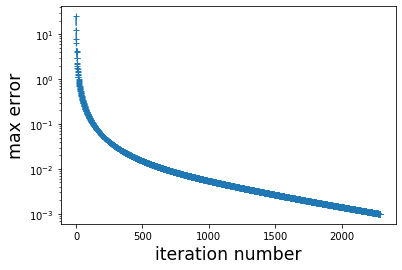

In [72]:
iters = np.arange(0,N_iter,1)
print(iters)
plt.semilogy(iters, max_err[:N_iter], "-.+")

plt.xlabel('iteration number', fontsize = 'xx-large')
plt.ylabel('max error', fontsize='xx-large')
plt.yscale('log')
plt.show()

### Examples for visualization

Finally, let's visualize our result in several different ways. You can play around with the plotting options (in particular, the "levels" argument to the contour plot) to make plots that you like.

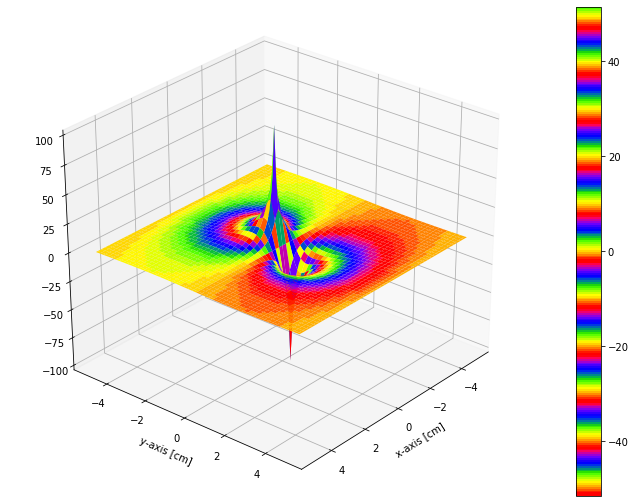

In [74]:
fig = plt.figure(figsize=(12,9))  # This figure has default axes. If you use subplots, there will be more than one.
ax = fig.gca(projection='3d')  # Gets the Current Axes
surf = ax.plot_surface(x,y,V, cmap=cm.prism)
cbar = fig.colorbar(surf)
ax.set_ylabel('y-axis [cm]')
ax.set_xlabel('x-axis [cm]')
ax.view_init(30, 40)

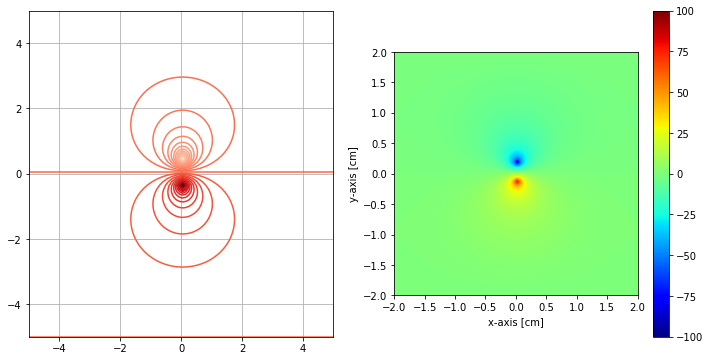

In [76]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,6))  # This instance of a figure has two axes, and we name them.

# First plot is a contour for equipotentials at the edges and somewhere in the middle
contour1 = ax1.contour(x, y, V, levels=np.arange(-100,100,5),cmap=cm.Reds)    
#ax1.clabel(contour1, fontsize=10, colors='black')  # label the contours
ax1.grid()  # Creates a grid to make it easier to read off x and y values
ax2.set_aspect('equal')
ax2.set_ylabel('y-axis [cm]')
ax2.set_xlabel('x-axis [cm]')
ax2.set_xlim([-2,2])
ax2.set_ylim([-2,2])

# Create an imshow visualization of the potential.  This maps color to values
img = ax2.imshow(V, origin='lower', interpolation='bicubic', cmap=cm.jet, 
                extent=[-2,2,-2,2])   

ax2.set_ylabel('y-axis [cm]')
ax2.set_xlabel('x-axis [cm]')
cbar = fig.colorbar(img)

Finally, calculate the electric field. Again, this code should be nearly identical to what you did in the last assignment. Now we are just operating on a different ```V```.

In [78]:
# Calculating E from V is this simple!
Ex = - (np.roll(V,-1,axis = 1) - np.roll(V,1,axis = 1))/2
Ey = - (np.roll(V,-1,axis = 0) - np.roll(V,1,axis = 0))/2
magE = np.hypot(Ex, Ey)

/Users/ammarsafdari/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: If 'color' is given, must have the shape of 'Grid(x,y)'

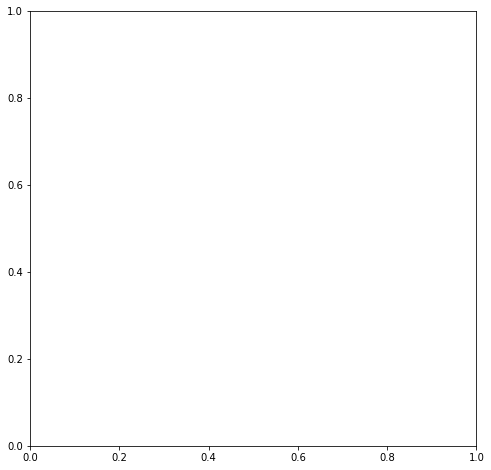

In [80]:
# Make a plot of E and V
fig, ax = plt.subplots(1, figsize=(8,8))
color = 2 * np.log(magE)    # colors the arrows based on field strength
ax.streamplot(x, y, Ex, Ey, color=color, linewidth=1, cmap=plt.cm.inferno,
              density=2, arrowstyle='->', arrowsize=1.5)
contour1 = ax.contour(x,y,V, levels=np.arange(-100,100,5),cmap=cm.Blues)
#ax.clabel(contour1, fontsize=10, colors='black')  # label the contours
ax.set_aspect('equal')
ax.set_xlabel('x-axis (cm)', fontsize=16)
ax.set_ylabel('y-axis (cm)', fontsize=16)
ax.set_xlim([-2,2])
ax.set_ylim([-2,2])

# Here is how to save a figure to a file:
plt.savefig('dipole_field.png')   # this function supports many formats... .jpg, .gif, .pdf, etc.

This cell shows how to display the saved image from the previous cell. You'll need to do this in the assignment. Click on this cell to see the markdown syntax:

<img src="dipole_field.png" alt="E and V for a dipole" style="width: 400px;"/>

You can use this same approach to solve <i>any</i> problem that you can describe with appropriate boundary conditions. For example, what happens if you place a point charge above a grounded plane? What happens if you add a small vertical projection to the plane? Now you are describing a charged thundercloud above a tree or building. You can think of many more examples, some of which might make good final projects.

For this week's assignment, we'll study the parallel-plate capacitor. To specify these boundary conditions, you'll need to set the potential on two segments of pixels near the middle of your grid. We'll again illustrate this with a small "toy" array.

In [ ]:
V = np.zeros((12,12))   # initialize a small array
print('This is the original array:')
print(V)
print('Set a short horizonal segment equal to 1:')
V[3][3:9] = 1
print(V)

In the above code, note that:
* Counter-intuitively, The ```y```-index is the first "slot" in the array, and the ```x```-index is the second.
* y-values start at zero in the top column and increase downward.
* x-values start from zero in the left column and increase to the right.
* Array indices start with zero: ```a[0]``` represents the first element of the array ```a```.
* When you specify a range of indices, the last element in your range is not included. For example, note that when we changed the value of x-elements \[3:9\] in the code above, it changed cells 3,4,5,6,7 and 8 (but not 9).

## Your assignment (due Friday, Feb. 7)

We'll consider a parallel-plate capacitor with width $L$ pixels and separation $d$ pixels. You will be changing $d$ so that we can study the field as a function of $d/L$. 

<img src="cap-illustration.png" alt="parallel-plate capacitor" style="width: 400px;"/>

### Part 1 (10 pts): Set up a grid to describe the region containing your capacitor, including appropriate values for the potential on the top and bottom plates.

Make a new ```impose_capacitor_boundary_conditions()``` function that describes a parallel-plate capacitor with a specified length $L$ and separation $d$. Set the potential to be +100 V on the top plate and -100 V on the bottom plate. Consider making the separation $d$ an argument to your function so that you can change it easily.

You will need to experiment with different grid spacings and shapes... your array does not necessarily have to be square. You'll want your grid to be fine enough to resolve the field between the plates, while being large enough to include the field well outside the plates. When I changed my code above to use a 1000 x 1000 grid ($=10^6$ cells), the method of relaxation still converged in a few seconds. 

In [ ]:
#makes grid that is 2*x_edge by 2*y_edge cm
def makeGrid(gridRows, gridCols, x_edge, y_edge):
    x, y = np.meshgrid(np.linspace(-x_edge,x_edge,gridCols),np.linspace(-y_edge,y_edge,gridRows))
    C = np.zeros((gridRows, gridCols))
    return x,y,C

In [ ]:
def impose_capacitor_boundary_conditions(L,d,C):
    numRows=len(C)
    numCols= len(C[0])
    top_voltage = 100
    bottom_voltage = -100
    start_col = int((numCols-L)/2)
    start_row = int((numRows-d)/2)
    C[start_row][start_col:start_col+L+1] = top_voltage
    C[start_row+d][start_col:start_col+L+1] = bottom_voltage
    return C
    
    #setting up the capacitor within the grid space

In [ ]:
def relax_capacitance(L,d,V): 
        relaxed_V = (1/4)*(np.roll(V,-1,axis=0)+np.roll(V,1,axis=0)+np.roll(V,-1,axis=1)+np.roll(V,1,axis=1))
        bounded_relaxed_V = impose_capacitor_boundary_conditions(L,d,relaxed_V)
        return bounded_relaxed_V
#this is running the relax function which takes the average of the 4 cells surrounding and replaces the value of that cell.
#second part makes sure that the parts of the capacitor stay at the same volatge
    

In [ ]:
def electric_field(V):
    Ex = -(1/2)*(np.roll(V,-1,axis=1)-np.roll(V,1,axis=1)) #doing the horizontal roll
    Ey = -(1/2)*(np.roll(V,-1,axis=0)-np.roll(V,1,axis=0))
    magE=np.hypot(Ex,Ey)
    return magE
#E = -gradV
    

In [ ]:
E_edge = np.zeros(6)
E_center = np.zeros(6)
x_edge = 200
y_edge = 200
rows = int(x_edge*5+1) #steps for makegrid
cols = int(y_edge*5+1) #change to 5 to run the 1000 by 1000
dx = 2*x_edge/(cols-1) #defining growth factor for increasing resolution but keeping capacitor the same relative size
dy = 2*y_edge/(rows-1)
L = 100
L_grid = int(L/dy) #pass into boundary conditions function
d_ratio = [.1,.2,.3,.5,1,2]
d_title = ['.1','.2','.3','.5','1','2']
x,y,C = makeGrid(rows,cols,x_edge,y_edge)

In [ ]:
N_iterations = 0
tolerance = .0001 #stops the loop when the values are changing by less than this
max_iterations = 1000000
max_error = np.zeros(max_iterations)
error = 1000
E_02 = []

# Part 2 (10 pts): Plot the equipotential contours for the following values of $d/L$: (0.1, 0.2, 0.3, 0.5, 1.0, 2.0). 

Save your plots and include them as described above. (You will need to upload these plots to Canvas along with your completed notebook.)

Full credit for: 

(1) Appropriately-chosen grid sizes so that the field is computed accurately in the regions of interest.  

(2) Clear and readable plots with axes labeled and the value of $d/L$ noted somewhere. 

Primer code for plotting these contours in the above code cells 



10.0
20.0
30.0
50.0
100
200


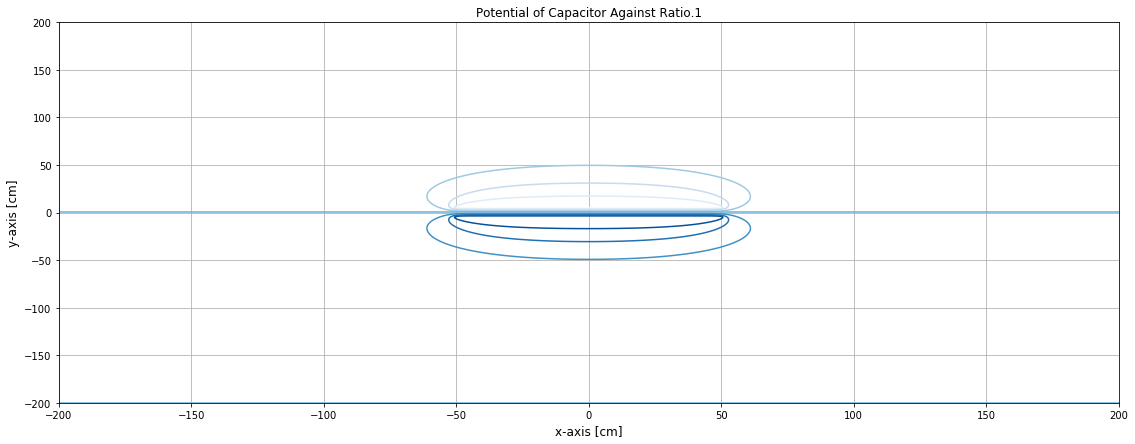

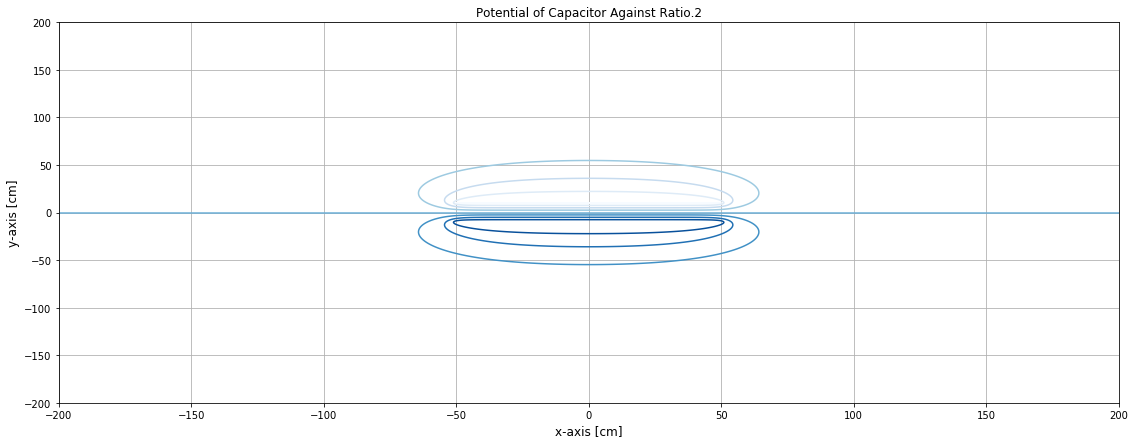

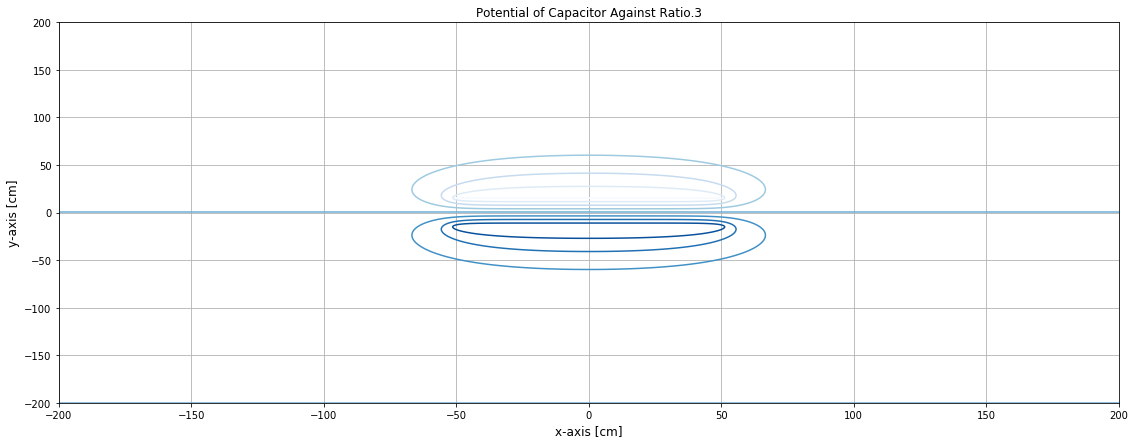

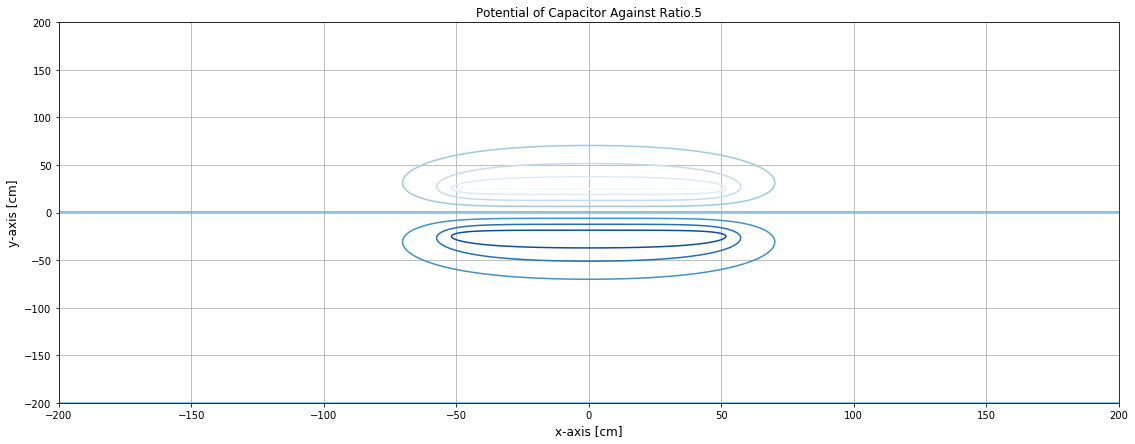

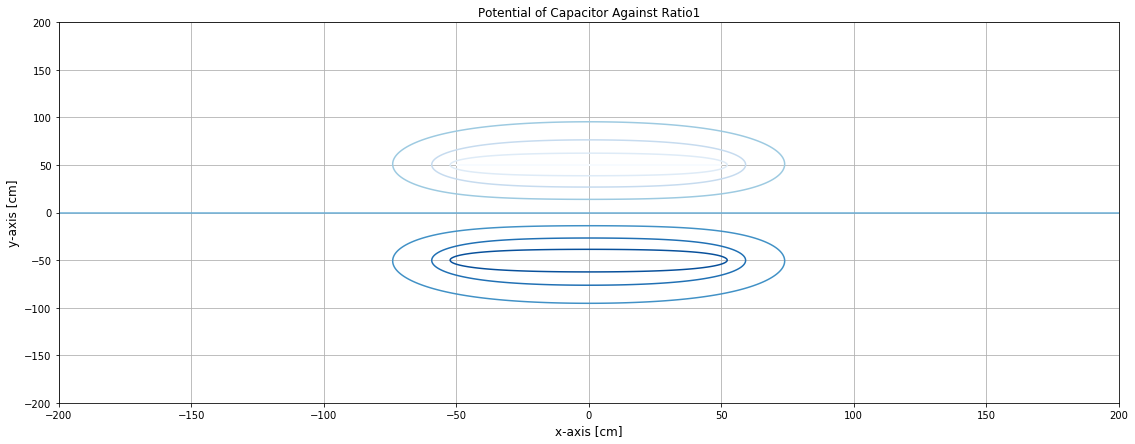

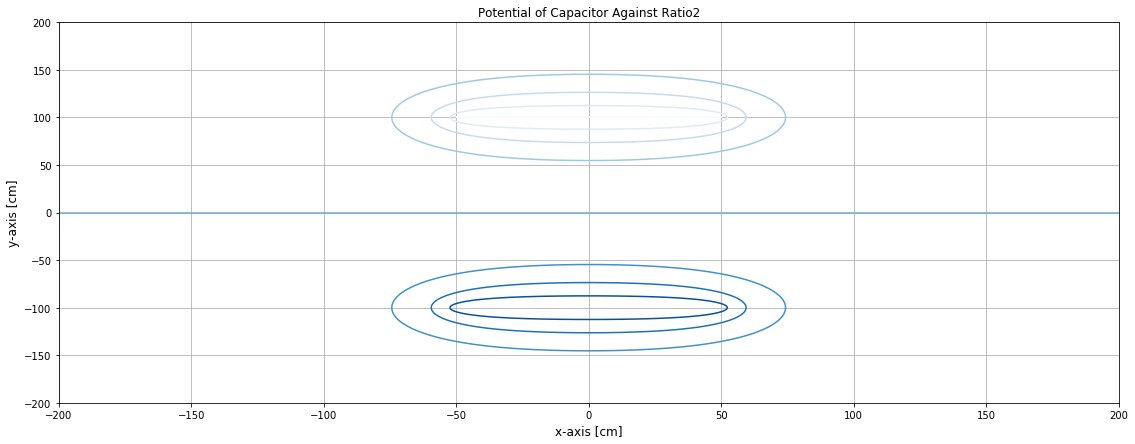

In [81]:
for i in range(len(d_ratio)):
    d = d_ratio[i]*L
    d_grid = int(d/dx)
    
    d_t = d_title[i]
    x,y,C = makeGrid(rows,cols,x_edge,y_edge)
    V = impose_capacitor_boundary_conditions(L_grid,d_grid,C)
    
    N_itertaions = 0
    error = 1000
    max_itertaions = 100000

   #computes the voltage 
    while error>tolerance and N_iterations<max_iterations:
        Vold = V #emort tehe 
        V = relax_capacitance(L_grid,d_grid,Vold)
        error = np.max(np.abs(V-Vold))
        max_error[N_iterations] = error
        N_iterations +=1
    print(d)
        
    #So far have relaxed the voltage and stored the max diff between new and old values for the voltage. Loop will stop when this error is below a specified value 
    #Now plotting the potential of capacitor with the specified ratios
    
    plt.figure(figsize=(19,7))
    contour1 = plt.contour(x,y,V,cmap=cm.Blues)
    plt.grid()
    plt.title("Potential of Capacitor Against Ratio" + d_t, fontsize = 12)
    plt.ylabel('y-axis [cm]',fontsize = 12)
    plt.xlabel('x-axis [cm]',fontsize = 12)
    plt.savefig('Capacitor Ratio'+d_t+'_field.png')
        
    #plots potential along with corresponding ratio
        
    E = electric_field(V)
    if(i == 1):
        E_02 = E
    
    E_center[i] = E[int(rows/2)][int(cols/2)]
    E_edge[i] = E[int(rows/2)][int(((cols-L_grid)/2))]        
        
    #finds electric field at the center and edge
    

Discussion Cell for Previous Code!! Somehow disappeared. Forgot Where Exactly it was initially Pls grade

Notable parts of this code include the scaling factor. This scaling factor allows me to increase the resolution of the simulation while keeping the capacitor the same size.

We can see the fringing effects in the last couple of plots. At first the two plates resemble two infinite sheets of charge essentially with very minimal fringe effects visible. The electric field lines are all primarily going striaght from one plate to the other. However as we scale up the ratio of d/L we find that the electric field lines curve greater and greater amaounts and become less dense near the center. 

*General note: the code does support a 1000 by 1000 matrix and some of the graphs converge better and the plot of Edge/Ecenter gets better as well. Submitted graphs a



### Part 3 (10 pts): Referring to the diagram above, make a plot of $E_{\mathrm{edge}}/E_{\mathrm{center}}$ as a function of $d/L$.

Use the same six $d/L$ values as in the previous section. Recall that in our idealized approximation, $E_{\mathrm{edge}}/E_{\mathrm{center}}$ is always $1$.

Full credit for a nice plot that shows how this "fringing field" <i>really</i> behaves.

[8.         3.99999952 2.66660406 1.59721031 0.71141825 0.07016889]
[6.28196117 3.07123021 2.01426234 1.16966218 0.48721165 0.04623945]
808889


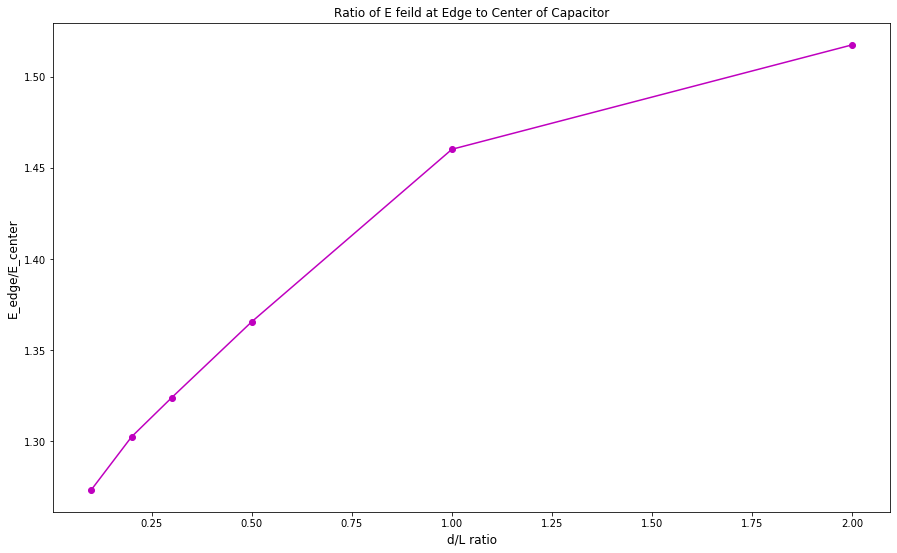

In [82]:
E_ratio = E_center/E_edge
dL = [.1,.2,.3,.5,1,2]

plt.figure(figsize = (15,9))
plt.title("Ratio of E feild at Edge to Center of Capacitor",fontsize =12)
plt.ylabel("E_edge/E_center",fontsize =12)
plt.xlabel("d/L ratio",fontsize =12)
plt.plot(dL, E_ratio,'-mo')


print(E_center)
print(E_edge)
print(N_iterations)
#finds the ratio of the electric field at the center to the edge and makes a plot against the ratio

### Part 4 (10 pts): For the case $d/L = 0.2$, make a plot of $E$ vs. $x$, where the $x$-axis is the line through the midplane of the capacitor.

Your plot should run from $x=-2L$ to $x=+2L$. About how far away from the edge do you need to be before the field strength reaches 10% of its peak value? How about 1% of its peak value?

Full credit for a nicely-labeled and correct plot. 

[1.27348766 1.30240954 1.32386135 1.3655313  1.46018318 1.51751132]
808889


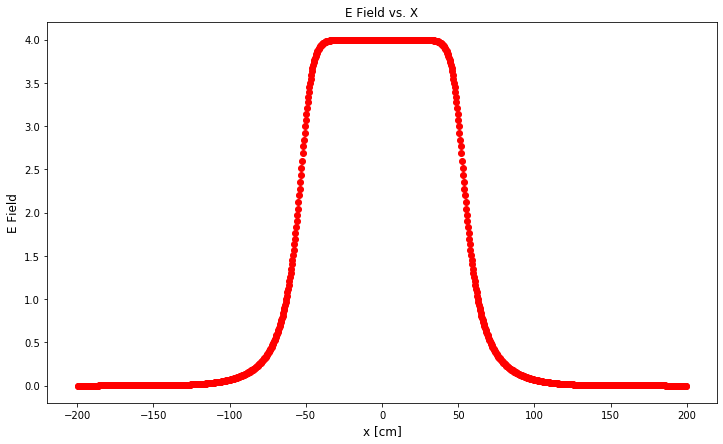

In [83]:
center_grid = int(cols/2)
x_plot = x[int(rows/2)][center_grid-2*L_grid+1:center_grid +2*L_grid]
E_plot = E_02[int(rows/2)][center_grid-2*L_grid+1: center_grid+2*L_grid]

plt.figure(figsize=(12,7))
plt.title("E Field vs. X", fontsize = 12)
plt.ylabel("E Field", fontsize =12)
plt.xlabel("x [cm]", fontsize = 12)
plt.plot(x_plot,E_plot,'ro')
print(E_ratio)
print(N_iterations)




In [84]:
ten_perc_max = 0;
i = 0

maximum = np.max(E_plot)
while ten_perc_max <= (maximum*.1):
    ten_perc_max = E_plot[i]
    index_ten_perc = i
    i = i+1
x_Ten_Perc = x_plot[index_ten_perc]

one_perc_max = 0
index_one_perc = 0
i = 0

while(one_perc_max <= maximum*.01):
    one_perc_max = E_plot[i]
    index_one_perc = i
    i +=1

one_perc_max = x_plot[index_one_perc]

print(maximum)
print(x_Ten_Perc)
print(one_perc_max)

#finds where the field strength decreases by a factor of ten and 100 respectively

3.99999952498573
-73.6
-107.19999999999999


Final Discussion
From these graphs we can see that the fringe effect increases proportional to the ratio of d/L. As the d/L ratio increases the curvature of the electric field at the edges becomes more and more pronounced and diverges from the electric field near the center of the capacitor (where it should most resemble your typical capacitor with a much bigger L than d). This result is encapsulated by the ratio of the E field at the edge to the center as it moves farther away from 1.

The field strength as you move outside the capacitor does not drop off to 0 immediately. The magnitude of the field strength drops to 20 percent of its maximum strength at a distance of around 20cm and to a strength of 1 percent around 60 cm away. This dropoff shows that the approximation still fares relatively well for a d/L ratio of .2.